##  ***Content***
### 1) Required Library 
### 2) Load the dataset
### Preprocessing
### 3) EDA
        3.1) Checking Missing Data
        3.2) Requirements For Exploration
        3.3) Explore Data with Visualization
### 4)Feature Selection
### 5)Feature Engineering
       5.1) Label Encoding
       5.2) Scaling
### Model Building
### 6)Model Creation
       6.1) Test Train Split
       6.2) Model Training
       6.3) Model Testing
       6.4) Performace result of the model


### 1) Required Library 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2) Load the dataset

In [4]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

### Preprocessing

### 3) EDA

   3.1) Checking Missing Data

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

3.2) Requirements For Exploration

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.000000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.037468,64.372489,0.349681,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,129.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


3.3) Explore Data with Visualization

<Axes: xlabel='Gender', ylabel='count'>

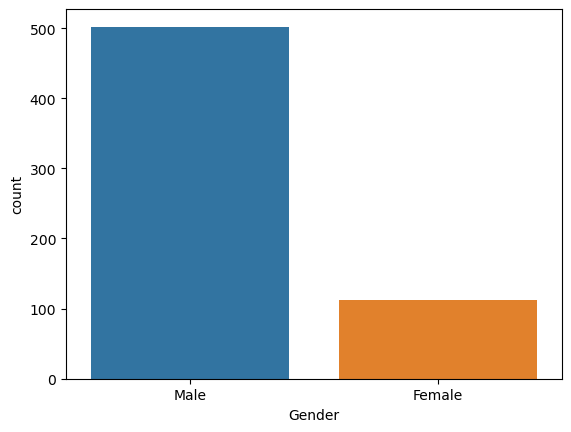

In [13]:
# categorical attributes visualization
sns.countplot(x=df['Gender'])

<Axes: xlabel='Married', ylabel='count'>

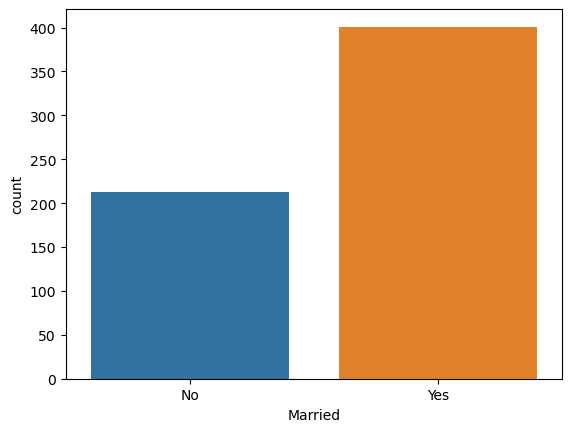

In [14]:
sns.countplot(x=df['Married'])

<Axes: xlabel='Dependents', ylabel='count'>

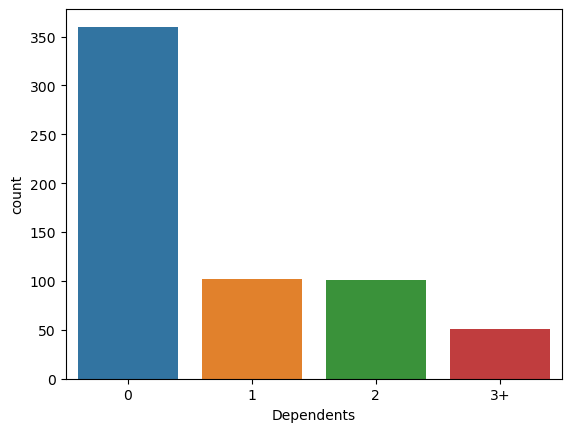

In [15]:
sns.countplot(x=df['Dependents'])

<Axes: xlabel='Education', ylabel='count'>

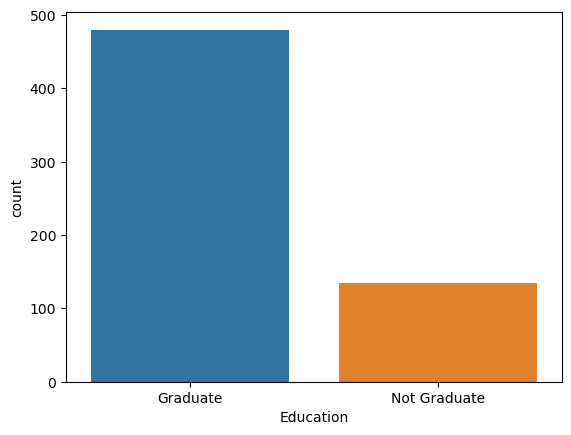

In [16]:
sns.countplot(x=df['Education'])

<Axes: xlabel='Self_Employed', ylabel='count'>

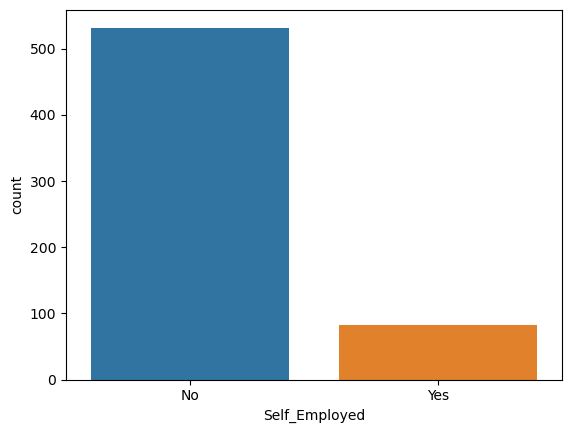

In [17]:
sns.countplot(x=df['Self_Employed'])

<Axes: xlabel='Property_Area', ylabel='count'>

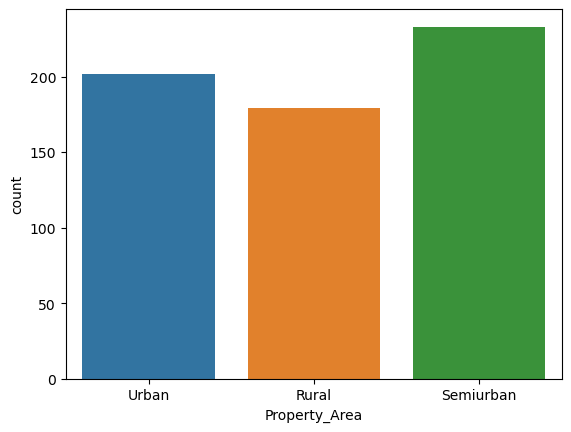

In [18]:
sns.countplot(x=df['Property_Area'])

<Axes: xlabel='Loan_Status', ylabel='count'>

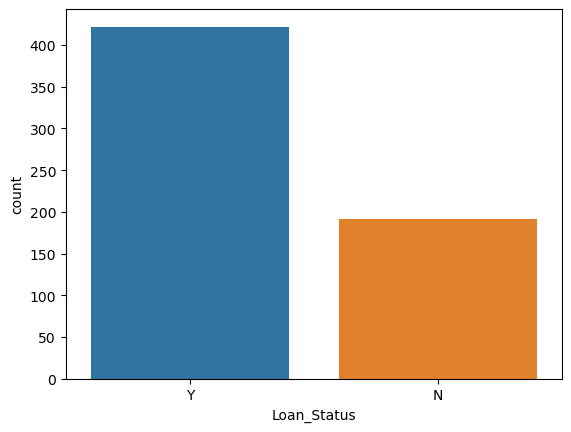

In [19]:
sns.countplot(x=df['Loan_Status'])

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

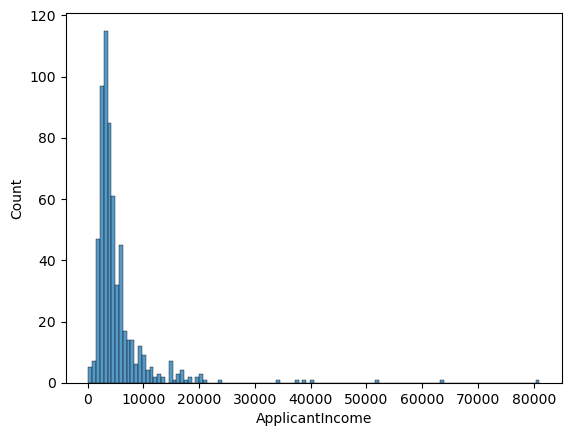

In [20]:
# numerical attributes visualization
sns.histplot(df["ApplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Count'>

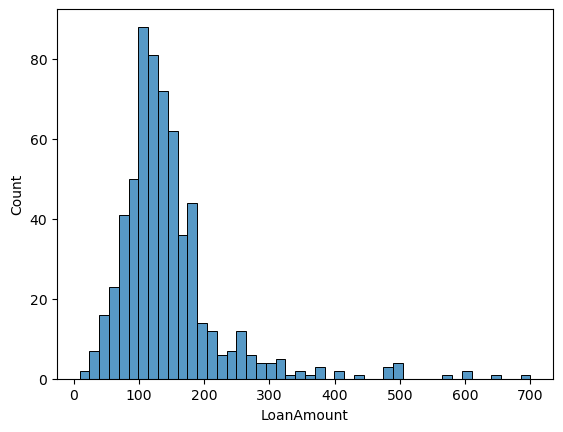

In [21]:
sns.histplot(df["LoanAmount"])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

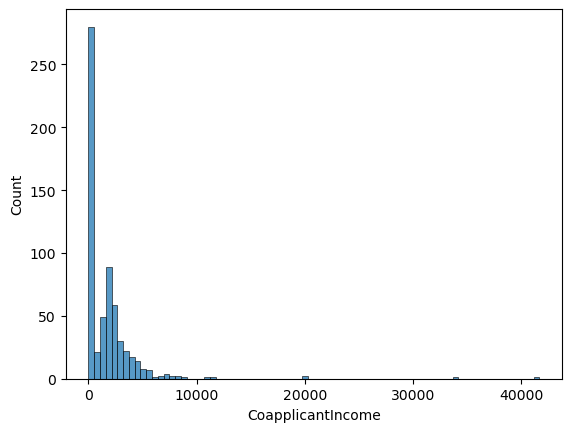

In [22]:
sns.histplot(df["CoapplicantIncome"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

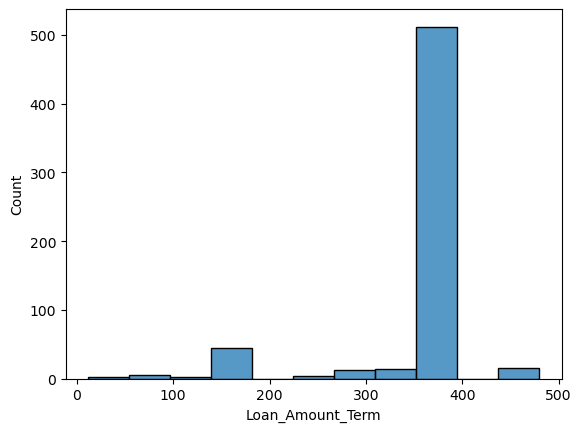

In [23]:
sns.histplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Count'>

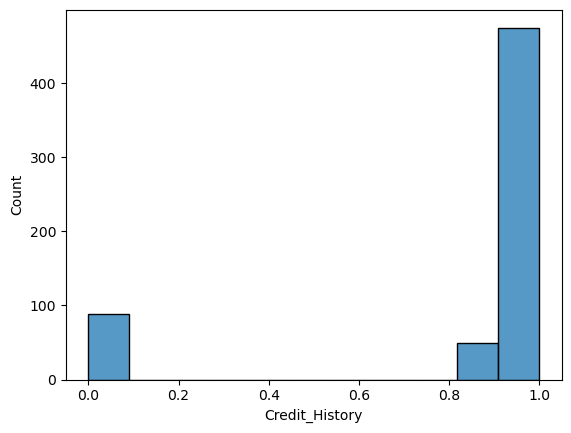

In [24]:
sns.histplot(df['Credit_History'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

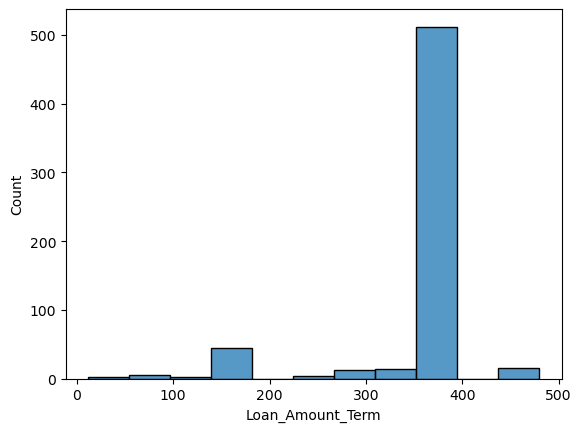

In [25]:
sns.histplot(df['Loan_Amount_Term'])

/home/raguldoss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


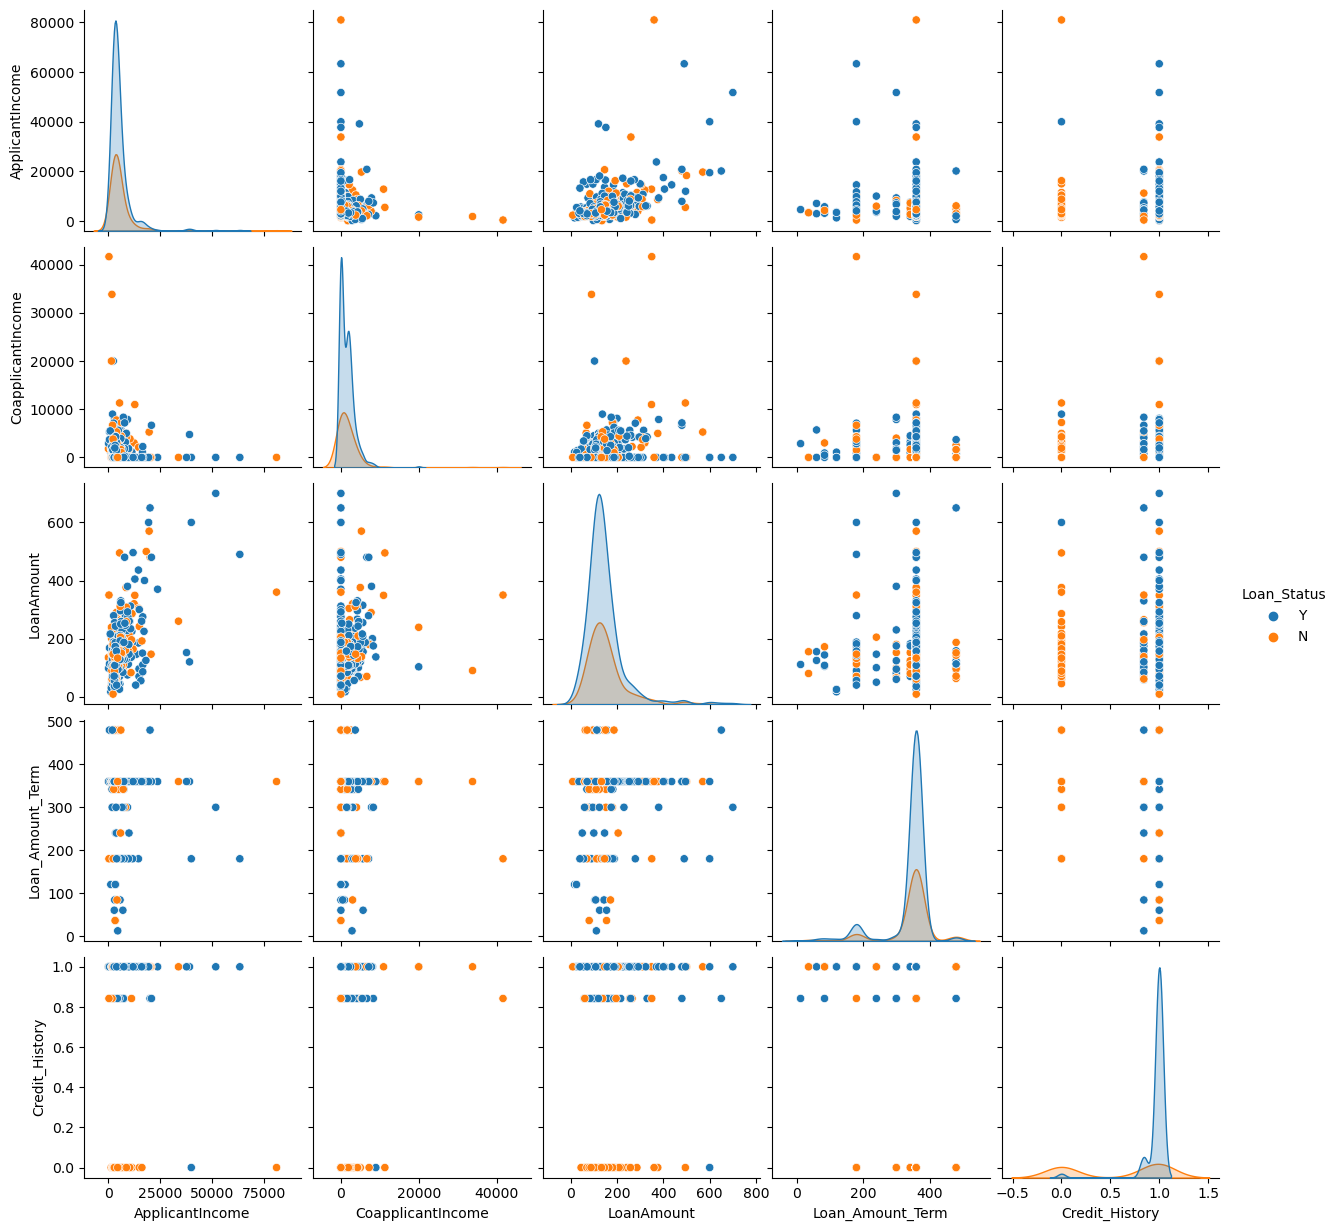

In [26]:
sns.pairplot(df,hue="Loan_Status")

### 4)Feature Selection

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [28]:
df=df.drop('Loan_ID',axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [29]:
num_v=df.select_dtypes(include=[np.number])
num_v

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [30]:
cat_v=df.select_dtypes(exclude=[np.number])
cat_v

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [31]:
df.shape

(614, 12)

In [32]:
corr=num_v.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<Axes: >

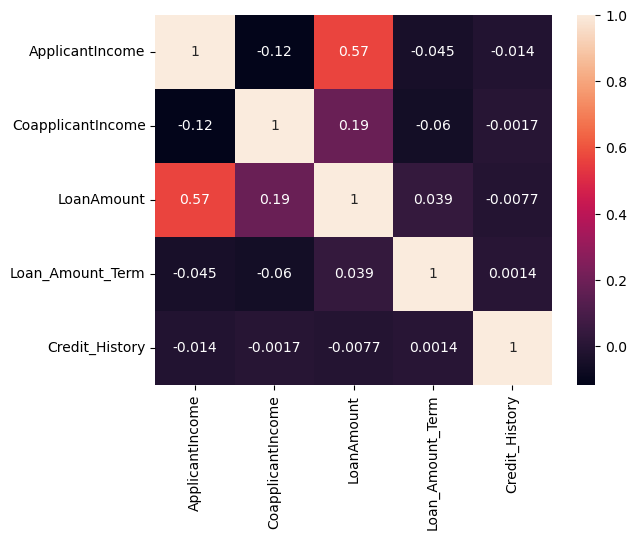

In [33]:
sns.heatmap(corr,annot=True)

### 5)Feature Engineering

5.1) Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder() 
for col in cols:
    df[col] = le.fit_transform(df[col])

In [35]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [36]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


5.2) Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [38]:
sc.fit(X)
X=sc.transform(X)
X

array([[1.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

### Model Building

### 6)Model Creation

####      Test Train Split , Model Training and Model Testing

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [49]:
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    print("Accuracy is", model.score(X_test, y_test)*100)
    score = cross_val_score(model, X, y, cv=5)
    print(score)
    print("Cross validation is",np.mean(score)*100)
    

In [50]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
print('LogisticRegression\n')
classify(model1, X, y)

LogisticRegression

Accuracy is 77.27272727272727
[0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
Cross validation is 80.78368652538984


In [51]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
print('DecisionTreeClassifier\n')
classify(model2, X, y)

DecisionTreeClassifier

Accuracy is 68.83116883116884
[0.69105691 0.68292683 0.77235772 0.73170732 0.73770492]
Cross validation is 72.31507397041183


In [52]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
print('KNN\n')
classify(model3, X, y)

KNN

Accuracy is 74.67532467532467
[0.78861789 0.77235772 0.77235772 0.80487805 0.80327869]
Cross validation is 78.82980141276823


### Performace result of the model

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model1.fit(X_train, y_train)         
predictions1 = model1.predict(X_test) 
model2.fit(X_train, y_train) 
predictions2 = model2.predict(X_test)
model3.fit(X_train, y_train) 
predictions3 = model3.predict(X_test)

In [46]:
print('LogisticRegression\n')
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, predictions1))
print("\nClassification Report:")
print(classification_report(y_test, predictions1))

LogisticRegression

Confusion Matrix:

[[21 33]
 [ 2 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [47]:
print('DecisionTreeClassifier\n')
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, predictions2))
print("\nClassification Report:")
print(classification_report(y_test, predictions2))

DecisionTreeClassifier

Confusion Matrix:

[[28 26]
 [21 79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        54
           1       0.75      0.79      0.77       100

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [48]:
print('KNN\n')
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, predictions3))
print("\nClassification Report:")
print(classification_report(y_test, predictions3))

KNN

Confusion Matrix:

[[22 32]
 [ 7 93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.41      0.53        54
           1       0.74      0.93      0.83       100

    accuracy                           0.75       154
   macro avg       0.75      0.67      0.68       154
weighted avg       0.75      0.75      0.72       154



## conclusion

### This machine learning project has successfully demonstrated the effectiveness of the chosen algorithms in solving the specified problem. Here, I tested three algorithm I got better Accuracy for LogisticRegression algorithm compare to rest of them

